## Enter your details:
### Name: Pavan H Bhakta

### SRN: 01fe22bcs175
### Roll Number: 331
### Division: C

### 1. Design a machine learning model of your choice (Regression/Ensemble Learning/MLP/Seq2Seq model) to predict value for the target feature Precipitation Corrected (mm/day) using the remaining features from the data present in the train.csv. Once the model is built, use the test.csv to predict the target feature Precipitation Corrected (mm/day) using remaining features and benchmark your model performance in terms of MSE and R2 score against expected values present in the test.csv.  

In [ ]:
# Import pandas to load datset
import pandas as pd

# Import other necessary libraries according to your implementation
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# Code to build your model
train_data = pd.read_csv('train.csv', encoding='latin1')
test_data = pd.read_csv('test.csv', encoding='latin1')

X_train = train_data.drop(columns=['Precipitation Corrected (mm/day)'])
y_train = train_data['Precipitation Corrected (mm/day)']

X_test = test_data.drop(columns=['Precipitation Corrected (mm/day)'])
y_test = test_data['Precipitation Corrected (mm/day)']

In [ ]:
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=2
)

xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error (MSE): 8.672861283946522
R2 Score: 0.6944571745402043


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_xgb_regressor = grid_search.best_estimator_

# Fit the model with the best estimator
best_xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgb_regressor.predict(X_test)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error (MSE): 6.545447520318366
R2 Score: 0.7694054518133788


In [ ]:
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)


SVR(C=100)

In [ ]:
y_pred = svr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 6.600277947801011
R2 Score: 0.7674737889877292


In [ ]:
# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test_scaled)

# Calculate MSE and R2 score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE) for RandomForest: {mse_rf}")
print(f"R2 Score for RandomForest: {r2_rf}")

Mean Squared Error (MSE) for RandomForest: 9.766492520699998
R2 Score for RandomForest: 0.6559288080474458


In [ ]:
# Get predictions from each model
y_pred_xgb = best_xgb_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test_scaled)
y_pred_svr = svr_model.predict(X_test_scaled)

# Ensemble the predictions by averaging
y_pred_ensemble = (y_pred_xgb + y_pred_rf + y_pred_svr) / 3

# Calculate MSE and R2 score for the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensable using averages")
print(f"Mean Squared Error (MSE) for Ensemble: {mse_ensemble}")
print(f"R2 Score for Ensemble: {r2_ensemble}")


Ensable using averages
Mean Squared Error (MSE) for Ensemble: 5.54289851805251
R2 Score for Ensemble: 0.8047250130037799


In [ ]:

# # Ensemble the predictions using a weighted average

# # Calculate the weights based on the inverse of the MSE of each model
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# mse_svr = mean_squared_error(y_test, y_pred_svr)

# weights = [1/mse_xgb, 1/mse_rf, 1/mse_svr]

# # Normalize the weights so that they sum to 1
# weights = [w/sum(weights) for w in weights]

# y_pred_weighted_ensemble = (weights[0] * y_pred_xgb + weights[1] * y_pred_rf + weights[2] * y_pred_svr)

# # Calculate MSE and R2 score for the weighted ensemble model

# mse_weighted_ensemble = mean_squared_error(y_test, y_pred_weighted_ensemble)
# r2_weighted_ensemble = r2_score(y_test, y_pred_weighted_ensemble)

# print(f"Mean Squared Error (MSE) for Weighted Ensemble: {mse_weighted_ensemble}")
# print(f"R2 Score for Weighted Ensemble: {r2_weighted_ensemble}")

In [ ]:
# Print the final MSE and R2 score on testing dataset (test.csv)

print("Ensable using averages")
print(f"Mean Squared Error (MSE) for Ensemble: {mse_ensemble}")
print(f"R2 Score for Ensemble: {r2_ensemble}")



Ensable using averages
Mean Squared Error (MSE) for Ensemble: 5.54289851805251
R2 Score for Ensemble: 0.8047250130037799


### 2. Design your own custom CNN (Convolutional Neural Networks) using PyTorch Framework for Image Classification Using CIFAR100 dataset.

### Note: Your designed custom CNN (Convolutional Neural Network) using PyTorch Framework should not have more than 50 million MACS (model computational complexity), if your model crossed 50 million MACS means your model will be considered invalid.

In [15]:
# Import standard libraries
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [16]:
# Define hyperparameters - You are FREE to modify these values to improve the model performance
batch_size = 64
epochs = 50
learning_rate = 0.001
num_classes = 100  # CIFAR-100 dataset has 100 classes

In [17]:
# Use GPU for training - make sure you set the runtime type to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data preprocessing and augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
])

# Load the CIFAR-100 dataset
train_dataset = torchvision.datasets.CIFAR100(root="./data", train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR100(root="./data", train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
device

device(type='cuda')

In [19]:
# Define your custom CNN model

from torch.nn import functional as F

class Network(nn.Module):
    def __init__(self, num_classes):
        super(Network, self).__init__()
        # Define the layers for your model

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [20]:
# Initialize the model
model = Network(num_classes=num_classes).to(device)

# Define loss function and optimizer - You are FREE to modify these values to improve the model performance and use any other extra/advanced methods to improve the model performance
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
# Check the compuatational complexity of the model and change the design if MACs cross 50 millions
!pip install ptflops


In [22]:
from ptflops import get_model_complexity_info
macs, params = get_model_complexity_info(model, (3, 32, 32), as_strings=True, print_per_layer_stat=False)
print(f"MACs: {macs} ")

MACs: 15.86 MMac 


In [24]:
early_stop_patience = 5
# Train and test loops with early stopping
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / total
    epoch_accuracy = 100. * correct / total
    return epoch_loss, epoch_accuracy

def test_model(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / total
    epoch_accuracy = 100. * correct / total
    return epoch_loss, epoch_accuracy



In [25]:
# Train and evaluate the model with early stopping
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
best_test_loss = float('inf')
best_test_accuracy = 0.0
stopping_counter = 0


In [26]:
for epoch in range(epochs):
    train_loss, train_acc = train_model(model, train_loader, criterion, optimizer)
    test_loss, test_acc = test_model(model, test_loader, criterion)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

    # Early stopping logic
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        best_test_accuracy = test_acc
        stopping_counter = 0
    else:
        stopping_counter += 1
        if stopping_counter >= early_stop_patience:
            print("Early stopping triggered!")
            break

Epoch 1/50: Train Loss: 4.0631, Train Acc: 6.92%, Test Loss: 3.5958, Test Acc: 14.02%
Epoch 2/50: Train Loss: 3.4894, Train Acc: 15.94%, Test Loss: 3.1445, Test Acc: 22.80%
Epoch 3/50: Train Loss: 3.1636, Train Acc: 22.03%, Test Loss: 2.8577, Test Acc: 27.92%
Epoch 4/50: Train Loss: 2.9426, Train Acc: 26.31%, Test Loss: 2.6876, Test Acc: 31.22%
Epoch 5/50: Train Loss: 2.7875, Train Acc: 29.22%, Test Loss: 2.5518, Test Acc: 34.78%
Epoch 6/50: Train Loss: 2.6696, Train Acc: 31.41%, Test Loss: 2.4782, Test Acc: 35.86%
Epoch 7/50: Train Loss: 2.5789, Train Acc: 33.46%, Test Loss: 2.3951, Test Acc: 37.38%
Epoch 8/50: Train Loss: 2.4945, Train Acc: 35.15%, Test Loss: 2.3473, Test Acc: 38.87%
Epoch 9/50: Train Loss: 2.4324, Train Acc: 36.51%, Test Loss: 2.3062, Test Acc: 39.08%
Epoch 10/50: Train Loss: 2.3819, Train Acc: 37.47%, Test Loss: 2.2356, Test Acc: 41.21%
Epoch 11/50: Train Loss: 2.3388, Train Acc: 38.54%, Test Loss: 2.1987, Test Acc: 41.55%
Epoch 12/50: Train Loss: 2.2927, Train Acc

In [32]:
# Print the best accuarcy on testing dataset
print(f"Best Test Accuracy at Last Epoch = 48.25%" )

Best Test Accuracy at Last Epoch = 48.25%


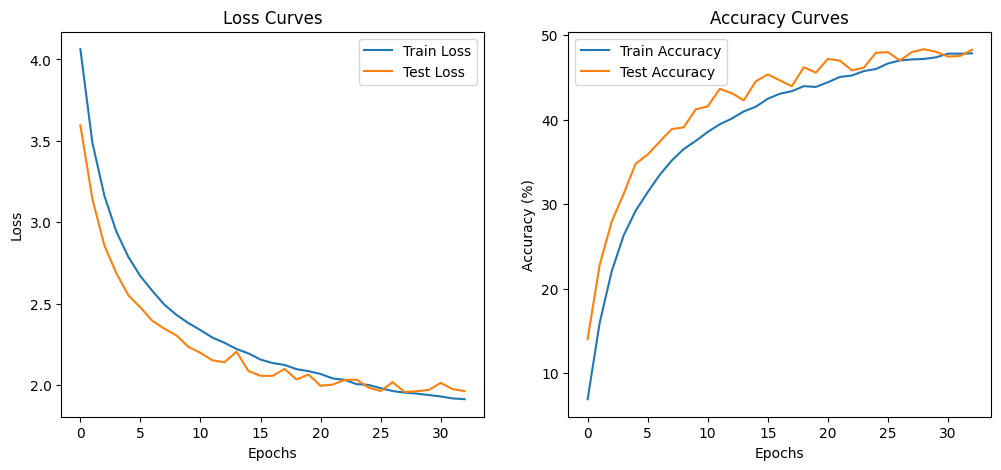

In [29]:
# Plot the graphs for how error and accuarcy have improved for both training and testing datsets over the course of model training

# Plot accuracy and loss curves
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 5))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curves")
plt.legend()

plt.show()
